In [ ]:
import module1
from importlib import reload
import random
reload(module1)

def run_experiment(name, img_size, channel_count):
    ca = module1.CellularAutomata(
        img_size=img_size, 
        channel_count=channel_count,
        layer_counts=[128],
        perception_kernel=module1.sobel_state_kernel())
    ca.noise_range = (0, 0) #(-0.1, 0.1)
    ca.conserve_mass = False
    ca.edge_strategy = module1.EdgeStrategy.MIRROR

    x0 = lambda: ca.pointfilled(ca.constfilled(1.0), point_value=0.0)
    xf = lambda: ca.bordered(ca.constfilled(1.0), border_value=0.0)
    training = module1.init_training(ca, learning_rate=1.0e-4)

    lifetime = 20
    training.run(x0, xf, lifetime, max_seconds=30)
    xs = training.do_sample_run(x0, xf, lifetime)
    training.save(name, xs)
    
#results = {}

# i : size of square
irange = range(4,12)
# j : number of channel triples
jrange = range(1,6)
nrange = range(5)

for i in irange:
    for j in jrange:
        for n in nrange:
            name = f"{i},{j},{n}"
            print(f"\nRunning experiment {name}")
            run_experiment(name, img_size=i, channel_count=j*3)
            #if (i,j) not in results: results[(i,j)] = []
            #results[(i,j)].append(res)

Mean of minimum losses across experiments:


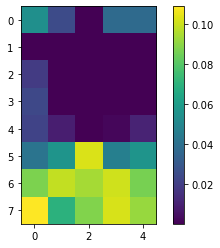

Mean of loss standard deviations:


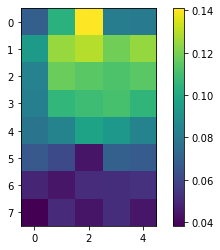

Mean of number of epochs in 30 secs:


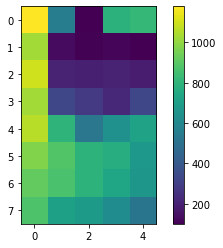

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import statistics as stats

vals = np.zeros([len(irange), len(jrange)])

print("Mean of minimum losses across experiments:")
for i in irange:
    for j in jrange:
        min_losses = []
        for n in nrange:
            with open(f"./results/{i},{j},{n}_loss_hist.txt", 'r') as f:
                min_losses.append(min([float(loss.strip()) for loss in f.readlines()]))
        vals[i-irange[0],j-jrange[0]] = stats.mean(min_losses)
plt.imshow(vals)
plt.colorbar()
plt.show()

print("Mean of loss standard deviations:")
for i in irange:
    for j in jrange:
        std_devs = []
        for n in nrange:
            with open(f"./results/{i},{j},{n}_loss_hist.txt", 'r') as f:
                std_devs.append(stats.stdev([float(loss.strip()) for loss in f.readlines()]))
        vals[i-irange[0],j-jrange[0]] = stats.mean(std_devs)
plt.imshow(vals)
plt.colorbar()
plt.show()

print("Mean of number of epochs in 30 secs:")
for i in irange:
    for j in jrange:
        lens = []
        for n in nrange:
            with open(f"./results/{i},{j},{n}_loss_hist.txt", 'r') as f:
                lens.append(len([float(loss.strip()) for loss in f.readlines()]))
        vals[i-irange[0],j-jrange[0]] = stats.mean(lens)
plt.imshow(vals)
plt.colorbar()
plt.show()